<a href="https://colab.research.google.com/github/smnizza/machine_learning/blob/main/SL_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM) – Pemisahan Kelas Menggunakan Hyperplane
Support Vector Machine (SVM) adalah algoritma pembelajaran mesin yang digunakan untuk **klasifikasi dan regresi**. SVM bekerja dengan **mencari hyperplane terbaik** yang memisahkan data ke dalam dua kelas dengan **margin terbesar**.

## Konsep Dasar SVM
1. **Hyperplane**: Garis pemisah (untuk 2D) atau bidang pemisah (untuk 3D atau lebih) antara dua kelas.
2. **Support Vectors**: Titik-titik data yang paling dekat dengan hyperplane dan menentukan posisi optimalnya.
3. **Margin Maksimal**: Jarak antara hyperplane dengan support vectors harus **sebesar mungkin** agar pemisahan lebih optimal.

✅ **Kelebihan SVM**:
- Cocok untuk **data berdimensi tinggi**.
- Efektif dalam kasus **data tidak teratur atau tidak terpisah secara linier**.
- Bisa digunakan untuk **klasifikasi non-linear** dengan menggunakan **Kernel Trick**.

❌ **Kekurangan SVM**:
- **Kurang optimal untuk dataset yang sangat besar** karena komputasi yang mahal.
- **Sulit untuk diinterpretasikan** dibandingkan Decision Tree.

## Implementasi SVM
Kita akan menggunakan dataset contoh untuk mengklasifikasikan apakah seorang pelanggan membeli produk berdasarkan usia dan pendapatannya.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Contoh dataset: Usia dan Pendapatan vs Keputusan Membeli
data = {
    "Usia": [25, 30, 35, 40, 45, 20, 50, 60, 55, 23],
    "Pendapatan": [30, 50, 70, 90, 110, 20, 130, 140, 120, 25],
    "Membeli": [0, 0, 0, 1, 1, 0, 1, 1, 1, 0]  # 0 = Tidak Beli, 1 = Beli
}

df = pd.DataFrame(data)

# Split data menjadi fitur (X) dan target (y)
X = df[["Usia", "Pendapatan"]]
y = df["Membeli"]

# Pisahkan data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model SVM dengan kernel linear
model = SVC(kernel="linear", C=1.0, random_state=42)
model.fit(X_train, y_train)

# Prediksi hasil
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.00

Confusion Matrix:
 [[1 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



## Visualisasi Hyperplane SVM
Kita akan memvisualisasikan garis pemisah (hyperplane) yang dibuat oleh SVM.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


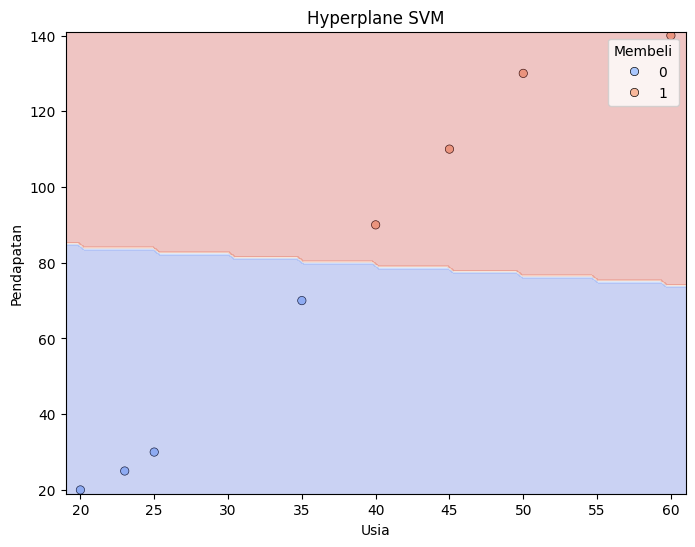

In [2]:
def plot_svm_boundary(model, X, y):
    plt.figure(figsize=(8, 6))

    # Plot titik data
    sns.scatterplot(x=X["Usia"], y=X["Pendapatan"], hue=y, palette="coolwarm", edgecolor="k")

    # Buat meshgrid untuk menggambar decision boundary
    x_min, x_max = X["Usia"].min() - 1, X["Usia"].max() + 1
    y_min, y_max = X["Pendapatan"].min() - 1, X["Pendapatan"].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Gambar decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.xlabel("Usia")
    plt.ylabel("Pendapatan")
    plt.title("Hyperplane SVM")
    plt.show()

# Plot hyperplane
plot_svm_boundary(model, X_train, y_train)

## Kesimpulan
Support Vector Machine (SVM) adalah algoritma yang kuat untuk **klasifikasi**, terutama untuk **data berdimensi tinggi dan non-linear**.

### **Kapan Menggunakan SVM?**
- Jika dataset **tidak terlalu besar** (karena komputasi SVM bisa mahal).
- Jika data memiliki **banyak fitur**.
- Jika ingin menggunakan **klasifikasi non-linear** dengan **Kernel Trick**.

### **Pengembangan Lebih Lanjut**
- **Mencoba kernel lain** seperti `poly`, `rbf`, atau `sigmoid` untuk klasifikasi non-linear.
- **Menggunakan SVM untuk deteksi anomali** seperti fraud detection.
- **Menyesuaikan parameter C dan gamma** untuk meningkatkan performa model.